In [1]:
import torch

from PIL import Image
from torchvision import transforms

from pytorch_pretrained_vit import ViT

import json

前処理

In [2]:
img_path = './static/lion01.jpeg'

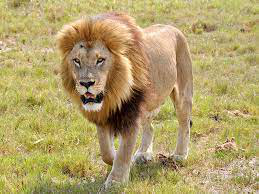

In [5]:
img = Image.open(img_path)
img

In [6]:
model = ViT('B_16_imagenet1k', pretrained=True)

Loaded pretrained weights.


In [7]:
tfms = transforms.Compose([
    transforms.Resize(model.image_size),
    transforms.ToTensor(),
    transforms.Normalize(0.5, 0.5),
])
img = tfms(img)
img

tensor([[[ 0.6078,  0.5608,  0.5137,  ...,  0.3882,  0.3882,  0.3961],
         [ 0.5451,  0.5216,  0.4980,  ...,  0.4118,  0.4118,  0.4196],
         [ 0.4196,  0.4353,  0.4588,  ...,  0.4510,  0.4510,  0.4588],
         ...,
         [ 0.2549,  0.4196,  0.5216,  ...,  0.6000,  0.6000,  0.6000],
         [ 0.2549,  0.4196,  0.5216,  ...,  0.6000,  0.6000,  0.6000],
         [ 0.2549,  0.4196,  0.5216,  ...,  0.6000,  0.6000,  0.6000]],

        [[ 0.6157,  0.5686,  0.5137,  ...,  0.2784,  0.2784,  0.2863],
         [ 0.5529,  0.5294,  0.4980,  ...,  0.3098,  0.3098,  0.3098],
         [ 0.4275,  0.4431,  0.4588,  ...,  0.3647,  0.3647,  0.3647],
         ...,
         [ 0.2314,  0.3882,  0.4824,  ...,  0.4510,  0.4510,  0.4510],
         [ 0.2314,  0.3882,  0.4824,  ...,  0.4510,  0.4510,  0.4510],
         [ 0.2314,  0.3882,  0.4824,  ...,  0.4510,  0.4510,  0.4510]],

        [[-0.1216, -0.1529, -0.1843,  ..., -0.2157, -0.2157, -0.2078],
         [-0.1843, -0.1922, -0.2000,  ..., -0

In [8]:
model.image_size

(384, 384)

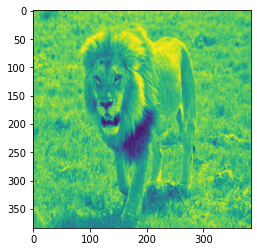

In [9]:
import matplotlib.pyplot as plt

plt.imshow(img[0].view(384, 384))
plt.show()

In [10]:
img = img.unsqueeze(0)

In [11]:
with torch.no_grad():
    outputs = model(img)

In [12]:
pred = torch.argmax(outputs)

In [13]:
labels_map = json.load(open('labels_map.txt'))

In [14]:
labels_map = [labels_map[key] for key in labels_map]

In [15]:
labels_map[pred]

'lion, king of beasts, Panthera leo'